# Lab 1

Name: **Elmer Canales**

Date: **March 1, 2025**

# Part 1: The Gravitional Potential of the Earth
___

In [1]:
# Importing all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy.integrate import quad

In [3]:
# Defining the gravtional function
# The function takes 5 inputs, the mass of the main body and 2 xy coordinates
def gravational_potential(M, xm, ym, x, y):
    G = 6.67e-11
    # Using np.isclose() to return np.nan to prevent the function from exploding or dividing by zero
    if np.isclose(xm, x) and np.isclose(ym, y):
        G_potential = np.nan
    else:
        r = np.sqrt((xm - x)**2 + (ym - y)**2)
        G_potential = - G * M / r
    return G_potential

# Vectorizing the function
Gravitional_Potential = np.vectorize(gravational_potential)

# Informing the user about the different inputs and what will be calculated based on the inputs
print("Please enter a value for the mass of the point source and two xy coordinates, one for the point mass source")
print("and second as the distance from the mass source you would like to calculate the gravtional potential.")
print("Note: Do not use letters (expect 'e') or spaces!")

# Using while' and 'if' statement to take user input and loop if the input is invalid
loop = ""
while loop == "":
    # Letting user input a number for the mass
    user_M = input("\nEnter a value for the mass (kg):")
    # checks for letters
    letter_checker = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_M))  
    # check for spaces
    space_checker = " " in user_M
    if letter_checker == False or space_checker == False:
        user_M = float(user_M)
        break
    else:
        print("Please enter a proper input!")

while loop == "":
    # Letting user input a number for x
    user_x = input("\nEnter a value for x:")
    # checks for letters
    letter_checker = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_x))  
    # check for spaces
    space_checker = " " in user_x
    if letter_checker == False or space_checker == False:
        user_x = float(user_x)
        break
    else:
        print("Please enter a proper input!")
        
while loop == "":
    # Letting user input a number for y
    user_y = input("\nEnter a value for y:")
    # checks for letters
    letter_checker = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_y))  
    # check for spaces
    space_checker = " " in user_y
    if letter_checker == False and space_checker == False:
        user_y = float(user_y)
        break
    else:
        print("Please enter a proper input!")

while loop == "":
    # Letting user input a number for xm
    user_xm = input("\nEnter a value for xm:")
    # checks for letters
    letter_checker = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_xm))  
    # check for spaces
    space_checker = " " in user_xm
    if letter_checker == False and space_checker == False:
        user_xm = float(user_xm)
        break
    else:
        print("Please enter a proper input!")

while loop == "":
    # Letting user input a number for ym
    user_ym = input("\nEnter a value for ym:")
    # checks for letters
    letter_checker = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_ym))  
    # check for spaces
    space_checker = " " in user_ym
    if letter_checker == False and space_checker == False:
        user_ym = float(user_ym)
        break
    else:
        print("Please enter a proper input!")

# Calculate the gravtional potential based on the user's input
GP = Gravitional_Potential(user_M, user_x, user_y, user_xm, user_ym)

# Display what the user's inputted and the result of the calculation
print(f"\nYou've entered: {user_M:.2e} kg for the mass, {user_x} for x, {user_y} for y, {user_xm} for xm, and {user_ym} ym.")
print(f"Based on your inputted values, the gravitional potential is: {GP:.2e} J / kg\n")

Please enter a value for the mass of the point source and two xy coordinates , one for the point mass source
and second as the distance from the mass source you would like to calculate the gravtional potential.
Note: Do not use letters (expect 'e') or spaces!


KeyboardInterrupt: Interrupted by user

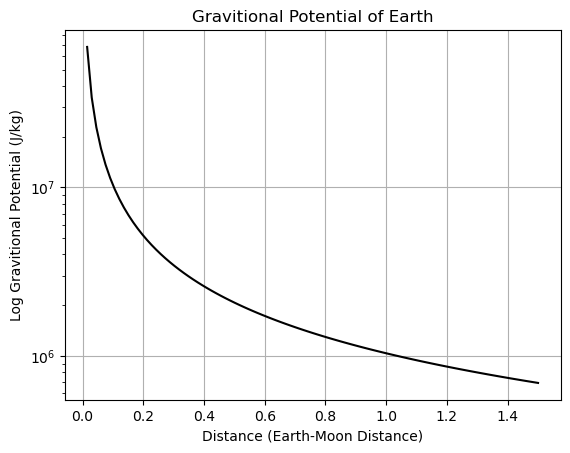

In [4]:
distance_Earth_Moon = 3.8e8           # Meters

# Initializing distance variables to calculate the gravtional potential
xm = np.linspace(0, 1.5, 100)         # Distance between Earth and the Moon
# Converting to meters for units consistency
xm_meters = xm * distance_Earth_Moon  # Meters
ym = 0

# Position of the Earth for the scenario
x_earth = 0
y_earth = 0
# Calculating the gravtional potential based on those distances
GP = Gravitional_Potential(5.9e24, x_earth, y_earth, xm_meters, ym)

# Plotting the gravtional position at various x
fig, ax_gp = plt.subplots(1, 1)
ax_gp.plot(xm, np.abs(GP), color = 'black')
# Labeling the plot
ax_gp.set_xlabel("Distance (Earth-Moon Distance)")
ax_gp.set_ylabel("Log Gravitional Potential (J/kg)")
ax_gp.set_title("Gravitional Potential of Earth")
# Setting the y-scale to log to better display the plot
ax_gp.set_yscale("log")
ax_gp.grid()

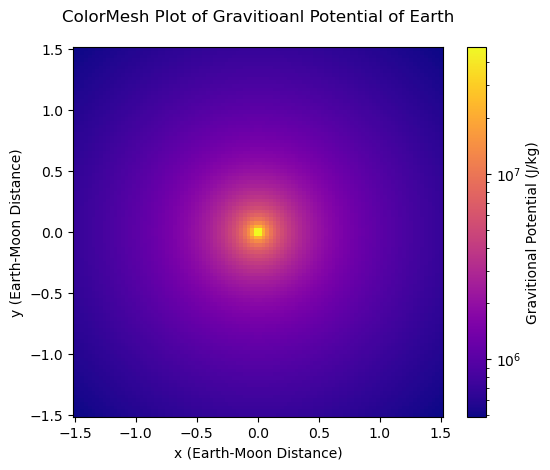

In [22]:
# Initializing xy variables to calculate the gravitional potential, along with converting them to meters
xm = np.linspace(-1.5, 1.5, 100)         # Distance between Earth and the Moon
xm_meters = xm * distance_Earth_Moon     # Meters
ym = np.linspace(-1.5, 1.5, 100)         # Distance between Earth and the Moon
ym_meters = ym * distance_Earth_Moon     # Meters

# Turning both xy variables to meshgrid
grid_xm_meters, grid_ym_meters = np.meshgrid(xm_meters, ym_meters)
grid_xm, grid_ym = np.meshgrid(xm, ym)
GP = Gravitional_Potential(5.9e24, 0, 0, grid_xm_meters, grid_ym_meters)

# Plotting a colormesh plot of the gravitional potential
fig, ax_gp_cm = plt.subplots(1, 1)
add_color = ax_gp_cm.pcolormesh(grid_xm, grid_ym, np.abs(GP), cmap = cm.plasma, norm = colors.LogNorm(vmin = np.abs(GP).min(), vmax = np.abs(GP).max()))
# Labeling the plot and other setting to make the plot look 'nice'
ax_gp_cm.set_xlabel('x (Earth-Moon Distance)')
ax_gp_cm.set_xlabel('x (Earth-Moon Distance)')
ax_gp_cm.set_ylabel("y (Earth-Moon Distance)")
ax_gp_cm.set_title("ColorMesh Plot of Gravitioanl Potential of Earth\n")
ax_gp_cm.set_aspect("equal")

# Adding and labeling the colorbar to mesh plot
cbar = fig.colorbar(add_color)
cbar.set_label("Gravitional Potential (J/kg)")

# Part 2: The Gravitional Potential of the Earth-Moon System
___

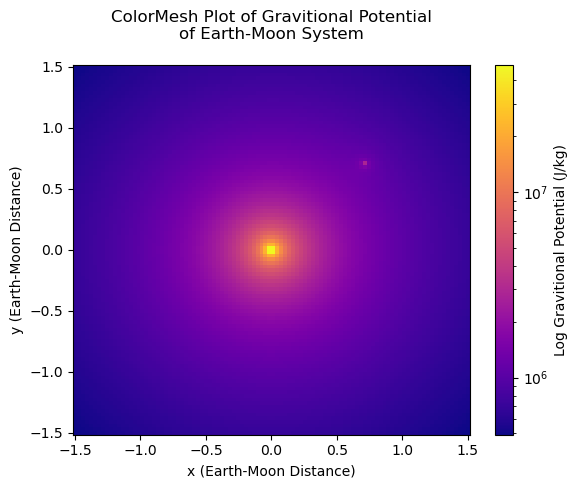

In [21]:
# Initializing all variables necessary to calculate the gravitional potential based on the Earth and Moon
# Earth variables
M_Earth = 5.9e24   #kg
x_Earth = 0
y_Earth = 0

# Moon variables
M_Moon = 7.3e22    # kg
x_Moon = (3.8e8) / np.sqrt(2)
y_Moon = (3.8e8) / np.sqrt(2)

# Initializing xy variables to calculate the gravitional potential from
xm = np.linspace(-1.5, 1.5, 100)         # Distance between Earth and the Moon
xm_meters = xm * distance_Earth_Moon     # Meters
ym = np.linspace(-1.5, 1.5, 100)         # Distance between Earth and the Moon
ym_meters = ym * distance_Earth_Moon     # Meters

grid_xm_meters, grid_ym_meters = np.meshgrid(xm_meters, ym_meters)
grid_xm, grid_ym = np.meshgrid(xm, ym)

# Calculating the gravitional potential of both the Earth and Moon and then adding them
GP_Earth = Gravitional_Potential(M_Earth, x_Earth, y_Earth, grid_xm_meters, grid_ym_meters)
GP_Moon = Gravitional_Potential(M_Moon, x_Moon, y_Moon, grid_xm_meters, grid_ym_meters)
GP_combine = np.abs(GP_Earth) + np.abs(GP_Moon)

# Plotting a color mesh plot of the gravitional potential of the Earth-Moon system
fig, ax_gp_cm = plt.subplots(1, 1)
# using 'lognorm' to make the gravtional potential log scale
add_mesh_color = ax_gp_cm.pcolormesh(grid_xm, grid_ym, GP_combine, cmap = cm.plasma, norm = colors.LogNorm(vmin = GP_combine.min(), vmax = GP_combine.max()))
# Labeling the plot
ax_gp_cm.set_xlabel('x (Earth-Moon Distance)')
ax_gp_cm.set_ylabel("y (Earth-Moon Distance)")
ax_gp_cm.set_title("ColorMesh Plot of Gravitional Potential\nof Earth-Moon System\n")

# Adding and labeling the colorbar
cbar = fig.colorbar(add_mesh_color)
cbar.set_label("Log Gravitional Potential (J/kg)")

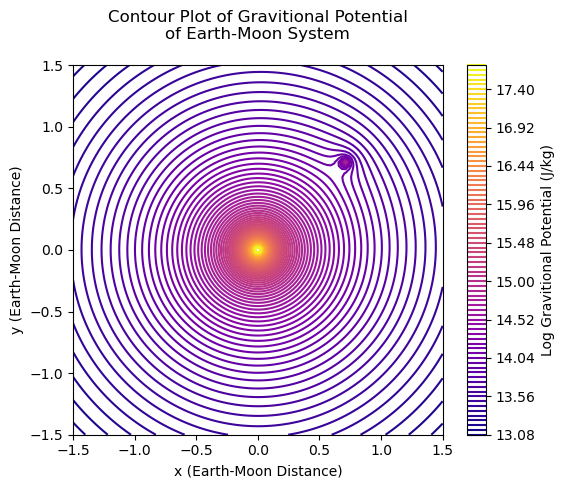

In [20]:
# Plotting a contour plot of the gravtional potential of the Earth-Moon system
fig_contour, ax_gp_contour = plt.subplots(1, 1)
add_contour_color = ax_gp_contour.contour(grid_xm, grid_ym, np.log(GP_combine), cmap = cm.plasma, levels = 80)
# Labeling the plot
ax_gp_contour.set_xlabel('x (Earth-Moon Distance)')
ax_gp_contour.set_ylabel("y (Earth-Moon Distance)")
ax_gp_contour.set_title("Contour Plot of Gravitional Potential\nof Earth-Moon System\n")
ax_gp_contour.set_aspect("equal")

# Addind and labeling the colorbar
cbar = fig.colorbar(add_contour_color)
cbar.set_label("Log Gravitional Potential (J/kg)")

# Part 3: The Gravitional Force Field of the Earth-Moon System
___

In [17]:
# Defining a function to take 6 inputs and calculate the gravitional force based on those inputs
def g_force(m1, m2, x1, y1, x2, y2):
    G = 6.67e-11
    M = m1 * m2
    # Using 'np.isclose()' to prevent the function from exploding and dividing by zero
    if np.isclose(x1, x2) and np.isclose(y1, y2):
        Fx = np.nan
        Fy = np.nan
        return Fx, Fy
    else:
        # Calculating the r-squared component
        r_squared = (np.sqrt((x1 - x2)**2 + (y1 - y2) **2))**2
        # Calculating vector and unit vector
        vector_r = np.array([x1 - x2, y1 - y2])
        vector_r_hat = vector_r / np.linalg.norm(vector_r)
        # Calculating the two gravitional force components
        Fx = - (G * M / r_squared) * vector_r_hat[0]
        Fy = - (G * M / r_squared) * vector_r_hat[1]
    return Fx, Fy
# Vectorizing the function
gravitional_force = np.vectorize(g_force)

# Using 'while' and 'if' statements to make sure user input is valid
loop = ""
while loop == "":
    # Letting user input a value for each variables
    user_m1 = input("\nEnter a value for the M1 (in kg):")
    user_m2 = input("Enter a value for the m2 (in kg):")
    
    user_x1 = input("\nEnter a value for the x1:")
    user_y1 = input("Enter a value for the y1:")
    
    user_x2 = input("\nEnter a value for the x2:")
    user_y2 = input("Enter a value for the y2:")
    
    # checks for letters
    letter_checker1 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_m1))
    letter_checker2 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_m2))
    letter_checker3 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_x1))
    letter_checker4 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_x2))
    letter_checker5 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_y1))
    letter_checker6 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_y2))
    letter_checker = np.array([letter_checker1, letter_checker2, letter_checker3, letter_checker4, letter_checker5, letter_checker6])
    # check for spaces
    space_checker1 = " " in user_m1
    space_checker2 = " " in user_m2
    space_checker3 = " " in user_x1
    space_checker4 = " " in user_x2
    space_checker5 = " " in user_y1
    space_checker6 = " " in user_y2
    space_checker = np.array([space_checker1, space_checker2, space_checker3, space_checker4, space_checker5, space_checker6])

    if np.any(letter_checker) == False and np.any(space_checker) == False:
        user_m1 = float(user_m1)
        user_m2 = float(user_m2)
        user_x1 = float(user_x1)
        user_x2 = float(user_x2)
        user_y1 = float(user_y1)
        user_y2 = float(user_y2)
        break
    else:
        print("Error! You have entered an invalid value for one of the variables!")
        
# Displaying what the user have entered and the results of the calculation
print(f"\nYou have entered the following values:\nM1 = {user_m1:.2e}\nm2 = {user_m2:.2e}\nx1 = {user_x1:.2f}\nx2 = {user_y1:.2f}\ny1 = {user_x2:.2f}\ny2 = {user_y2:.2f}")

Fx, Fy = gravitional_force(user_m1, user_m2, user_x1, user_y1, user_x2, user_y2)
print(f"\nThe gravitional force experinced by the objects is {Fx:.2e} N for Fx and {Fy:.2e} N for Fy.")


Enter a value for the M1 (in kg): 6e22
Enter a value for the m2 (in kg): 3e21

Enter a value for the x1: 0
Enter a value for the y1: 0

Enter a value for the x2: 5
Enter a value for the y2: 7



You have entered the following values:
M1 = 6.00e+22
m2 = 3.00e+21
x1 = 0.00
x2 = 0.00
y1 = 5.00
y2 = 7.00

The gravitional force experinced by the objects is 9.43e+31 N for Fx and 1.32e+32 N for Fy.


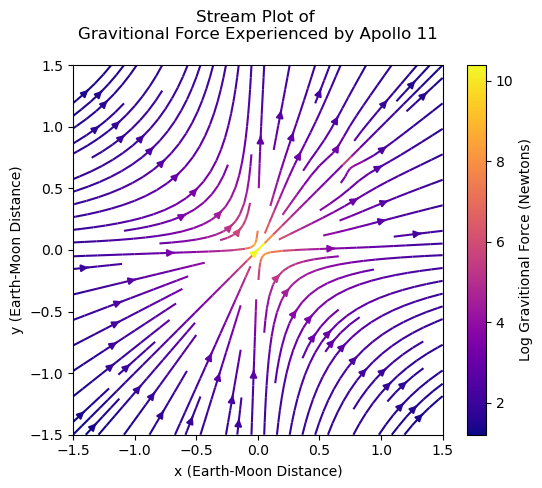

In [18]:
# Initializing mass variables
m_Earth = 5.9e24    # Mass of Earth
m_Moon = 7.3e22     # Mass of Moon
m_Apollo = 5500     # Mass of Apollo 11 Command Module

# Earth coordinate
x_Earth = 0
y_Earth = 0

# Moon coordinate
x_Moon = distance_Earth_Moon / np.sqrt(2)
y_Moon = distance_Earth_Moon / np.sqrt(2)

# Apollo 11 coordinates
x_Apollo = np.linspace(-1.5, 1.5, 100)               # Distance between Earth and the Moon
x_Apollo_meters = x_Apollo * distance_Earth_Moon     # Meters
y_Apollo = np.linspace(-1.5, 1.5, 100)               # Distance between Earth and the Moon
y_Apollo_meters = y_Apollo * distance_Earth_Moon     # Meters

# Transforming Apollo 11 coordinates to meshgrid
grid_x_Apollo_meters, grid_y_Apollo_meters = np.meshgrid(x_Apollo_meters, y_Apollo_meters)
grid_x_Apollo, grid_y_Apollo = np.meshgrid(x_Apollo, y_Apollo)

# Calculating the gravitional force and its components for both the Earth and Moon
GFx_Earth_Apollo, GFy_Earth_Apollo = np.abs(gravitional_force(m_Earth, m_Apollo, x_Earth, y_Earth, grid_x_Apollo_meters, grid_y_Apollo_meters))
GFx_Moon_Apollo, GFy_Moon_Apollo = np.abs(gravitional_force(m_Moon, m_Apollo, x_Moon, y_Moon, grid_x_Apollo_meters, grid_y_Apollo_meters))

# Combining them to get the total gravtional force for each component
GFx_total = GFx_Earth_Apollo + GFx_Moon_Apollo
GFy_total = GFy_Earth_Apollo + GFy_Moon_Apollo

# Calculating the log of the gravtional forces
stream_color = np.log(np.hypot(GFx_total, GFy_total))

# Plotting a streamline plot of the results of the calculations
fig, ax_gf_stream = plt.subplots(1, 1)
stream = ax_gf_stream.streamplot(grid_x_Apollo, grid_y_Apollo, GFx_total, GFy_total, color = stream_color, cmap = cm.plasma, density = 1)
# Labeling the plots
ax_gf_stream.set_xlabel('x (Earth-Moon Distance)')
ax_gf_stream.set_ylabel("y (Earth-Moon Distance)")
ax_gf_stream.set_title("Stream Plot of \nGravitional Force Experienced by Apollo 11\n")
ax_gf_stream.set_aspect("equal")

# Adding and labeling the colorbar
cbar = fig.colorbar(stream.lines)
cbar.set_label("Log Gravitional Force (Newtons)")

# Part 4: Altitude of the Saturn V Rocket
___

In [13]:
# Defining the function for the burn time of the rocket
def burn_time(m0, mf, m_dot):
    T = (m0 - mf) / m_dot
    return T

# Variables needed to calculate the burn time
m0 = 2.4e6    # kg
mf = 7.5e5    # kg
m_dot = 1.3e4 #kg/s
# Calculating and storing the burn time
T = burn_time(m0, mf, m_dot)

# Defining the function delta v
def delta_v(t):
    # Variable needed to calculate delta v
    ve = 2.4e3     # m/s
    m0 = 2.4e6     # kg
    m_dot = 1.3e4  # kg/s
    g = 9.81       # m^2/s
    mt = m0 - m_dot * t
    # Using an 'if' statement to return delta v as zero if there is no more fuel
    if mt <= 0:
        delta_vel = 0
    else:
        delta_vel = ve * np.log(m0 / mt) - g * t
    return delta_vel

# Vectorizing the function
delta_velocity = np.vectorize(delta_v)

# Using the 'quad' function to integrate the delta v function from 0 to the burn time
h, err = quad(delta_velocity, 0, T)
# Displaying the final altitude of the rocket
print(f"The final altitude of the Saturn V after burning all its fuel is {h:.2f} meters.")
print(T)

The final altitude of the Saturn V after burning all its fuel is 64546.80 meters.
126.92307692307692
